In [1]:
import bnlearn as bn

C:\Users\dlaa0001\Anaconda3\envs\pymc_env\lib\site-packages\torch\_masked\__init__.py:223: UserWarning: Failed to initialize NumPy: module compiled against API version 0xf but this version of numpy is 0xe (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)
  example_input = torch.tensor([[-3, -2, -1], [0, 1, 2]])


[bnlearn] >Downloading example [sprinkler] dataset..
100% [................................................................................] 1049 / 1049[bnlearn] >Import dataset..
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn]> Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


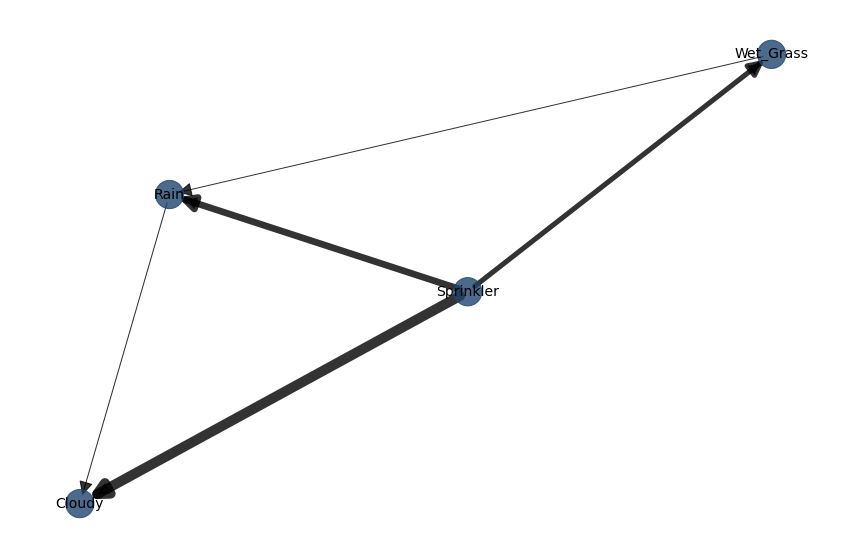

In [2]:
df = bn.import_example()

model = bn.structure_learning.fit(df)

model = bn.independence_test(model, df)

G = bn.plot(model)

[bnlearn] >Import <sprinkler>
[bnlearn] >Checking CPDs..
[bnlearn] >Check for DAG structure. Correct: True
[bnlearn] >Import dataset..
[bnlearn] >Forward sampling for 1000 samples..


  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Variable Elimination..


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+----+--------+-----------+
|    |   Rain |         p |
+====+========+===========+
|  0 |      0 | 0.0241546 |
+----+--------+-----------+
|  1 |      1 | 0.975845  |
+----+--------+-----------+
   Rain         p
0     0  0.024155
1     1  0.975845
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianNetwork.
[bnlearn] >CPD of Sprinkler:
+--------------+---------------------+---------------------+
| Wet_Grass    | Wet_Grass(0)        | Wet_Grass(1)        |
+--------------+---------------------+---------------------+
| Sprinkler(0) | 0.6658566221142163  | 0.5395072217502124  |
+--------------+---------------------+---------------------+
| Sprinkler(1) | 0.33414337788578374 | 0.46049277824978757 |
+--------------+---------------------+---------------------+
[bnlearn] >CPD of Cloudy:
+-----------+--------------------+--------------------+-----------------

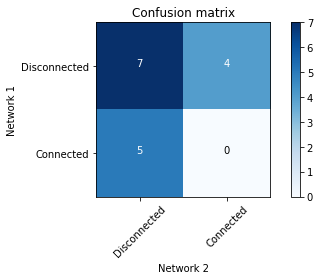

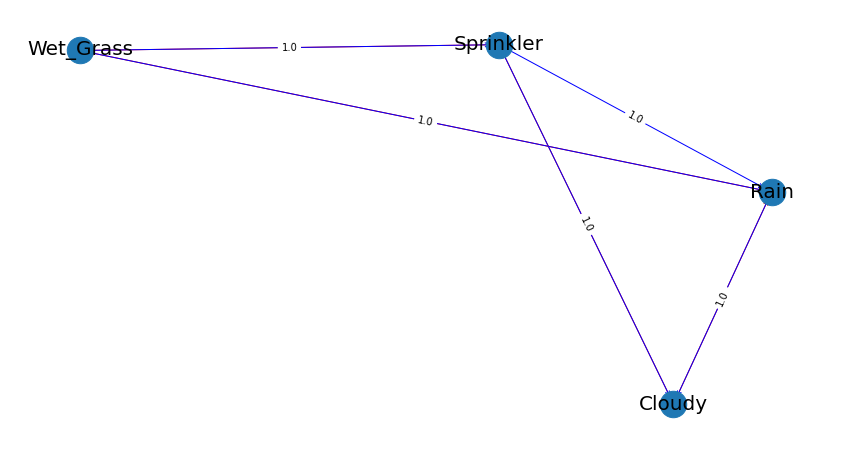

In [3]:
model = bn.import_DAG('sprinkler')

df = bn.import_example()

df = bn.sampling(model)

query = bn.inference.fit(model, variables=['Rain'], evidence={'Cloudy':1, 'Wet_Grass':1})
print(query.df)

model_sl = bn.structure_learning.fit(df)

model_pl = bn.parameter_learning.fit(model_sl, df)

scores, adjmat = bn.compare_networks(model_sl, model)

# EXAMPLE
## Titanic

In [2]:
import bnlearn
import pandas as pd
from scipy.stats import hypergeom

In [3]:
# Load titanic dataset
df = bnlearn.import_example(data='titanic')

print(df[['Survived','Sex']])

[bnlearn] >Downloading example [titanic_train] dataset..
100% [..............................................................................] 22510 / 22510[bnlearn] >Import dataset..
     Survived     Sex
0           0    male
1           1  female
2           1  female
3           1  female
4           0    male
..        ...     ...
886         0    male
887         1  female
888         0  female
889         1    male
890         0    male

[891 rows x 2 columns]


In [4]:
# Total number of samples
N=df.shape[0]
# Number of success in the population
K=sum(df['Survived']==1)
# Sample size/number of draws
n=sum(df['Sex']=='female')
# Overlap between female and survived
x=sum((df['Sex']=='female') & (df['Survived']==1))

print(x-1, N, n, K)

232 891 314 342


In [8]:
# Compute
P = hypergeom.sf(x, N, n, K)
# P = hypergeom.sf(232, 891, 314, 342)

print(P)

2.8832136462072402e-61


## Sprinkler

# TESTING

## Paper from Sun